# Chapter 8 Dimension Reduction

## 8.1 Overview 
 
 We visit principal component analysis in this chapter as an example of dimension reduction methods. The idea of capture the major sources of variances, i.e., principal components, is a general approach to many statistical procedures. Note that we discuss dimension reduction under the unsupervised learning scenario, meaning that there are no responses in consideration. The principal components characterize the variability in the given data set with relatively small number of variables. When an outcome (response) is specified and we want to find small number of variables to maximize the explanability of the outcome, the corresponding method is known as [sufficient dimension reduction](https://en.wikipedia.org/wiki/Sufficient_dimension_reduction). 
 
Recall in Chapter 7, we discuss clustering methods that put observations into distinct clusters. If we think of the $K$ cluster centers (median, mean, etc.) as the representatives of the $n$ observations, we reduce the sample size $n$ to a small amount $K$. If instead, we run clustering methods on the **features** instead of observations. We will find $K$ "features" as representative features. When $K < p$, we have reduced the dimenion of the data set. 

Dimension reduction methods find a low-dimensional representation of the observations that contain a good fraction of information in the original data. The primary task for dimension reduction is to reduce the dimension, whereas the cluster analysis aims to find homogeneous subgroups. It is possible to use cluster analyses for dimension reduction, for instance, treat the cluster centers as representative features.  

Typical  methods of dimension reduction includes 
- Principal Component Analysis (PCA)
- Multi-Dimensional Scaling (MDS)
- Kernel PCA, Sparse PCA, Manifold Learning, ...

These can generally be thought of as soft clustering or as vector space embedding. We only discuss the principal component analysis in this chapter. 


## 8.2 Principal Component Analysis

	



Suppose that we have a data set in an $n \times p$ matrix $X$. We find the number of features $p$ too large for our purpose, e.g., to visualize the data set in a two-dimensional plot. As a result, we would like to find the best two-dimensional representation of the data. 



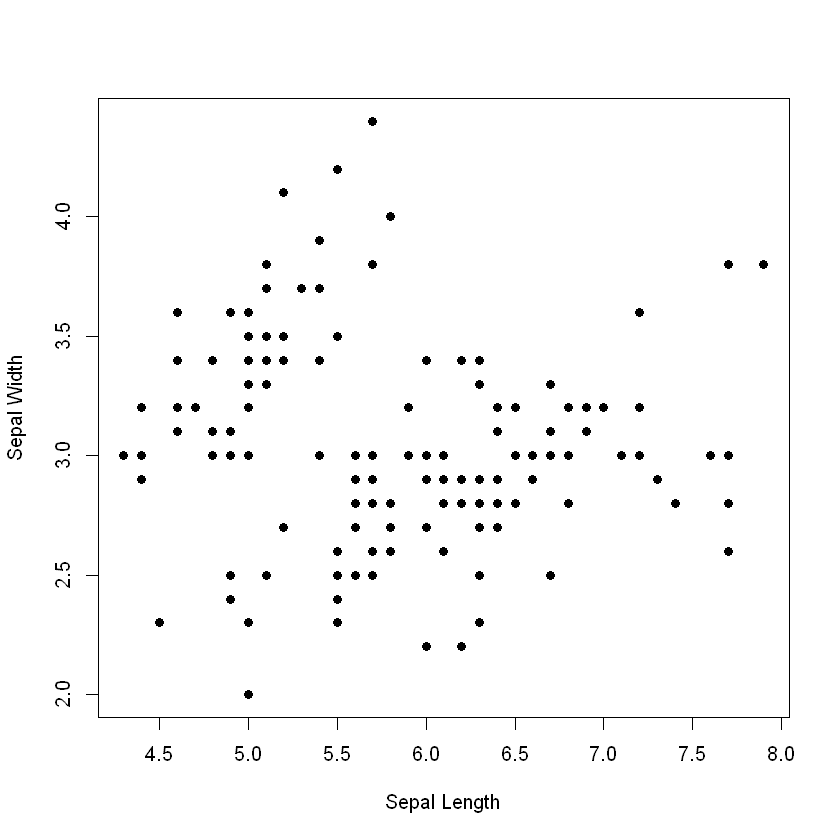

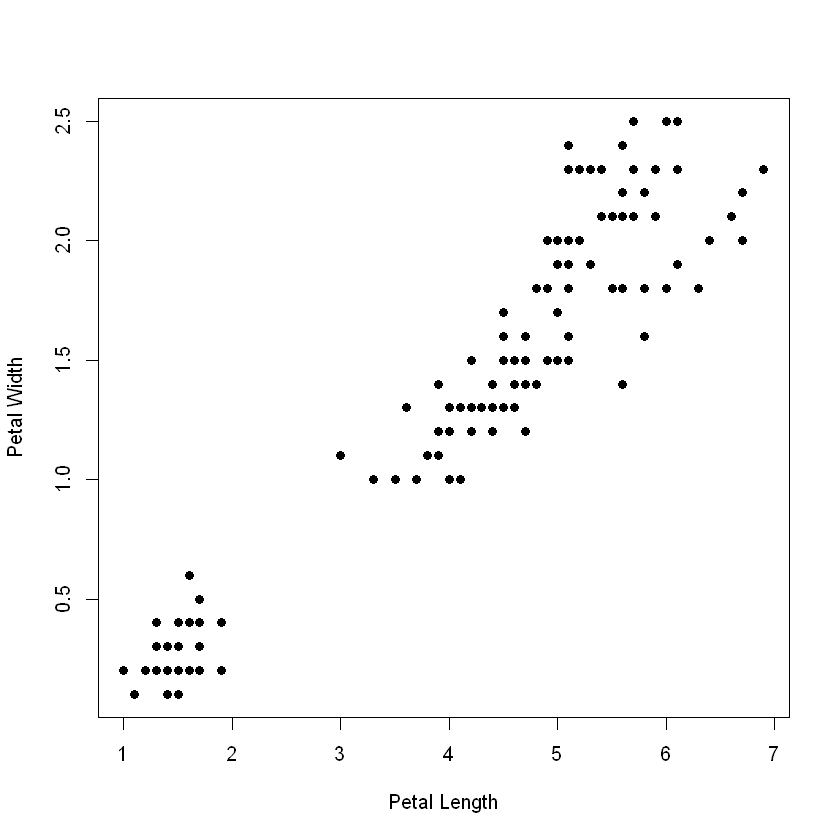

In [12]:
plot(x=iris$Sepal.Length,y=iris$Sepal.Width, pch=16,xlab="Sepal Length", ylab="Sepal Width")
plot(x=iris$Petal.Length,y=iris$Petal.Width, pch=16,xlab="Petal Length", ylab="Petal Width")


We can start with a good one-dimensional representation of the data. 

Some Possibilities:

- Use <span style="color:red"> one of the variables </span> (e.g. $X_1$).
$$
 Z_1 = X_1.
$$
- Better idea: use a linear combination of the variables; i.e. a weighted average of the variables.
$$
 Z_1 = \sum_{i=1}^p w_{1,i} X_i,
$$
where $w_{1,i}$ is the weight for $X_i$. This is a better idea since it includes the case for one single variable as a special case (e.g., $w_{1,1}=1$ and $w_{1,i}=0$ for $i\neq 1$).

But how do we find the optimal choice of weights? 

There can be many criteria for choosing the weights, and thus many "optimal" weights under different criteria. 

For principal component analysis, the criterion is to find weights that help explain the maximum amount of variance. 

A systematic way to find additional principal components (PC's) is to choose subsequent linear combinations  orthogonal/perpendicular to previous ones. 

Suppose that we are looking for the second direction 
$$
 Z_2 = \sum_{i=1}^p w_{2,i} X_i,
$$
The orthogonality constraint means that we want to choose $(w_{2,1}, w_{2,2}, \ldots, w_{2,p})^T$ to be orthogonal to $(w_{1,1}, w_{1,2}, \ldots, w_{1,p})^T$. At the same time, the two direction $Z_1$ and $Z_2$ need to explains the maximum variation in the data. 

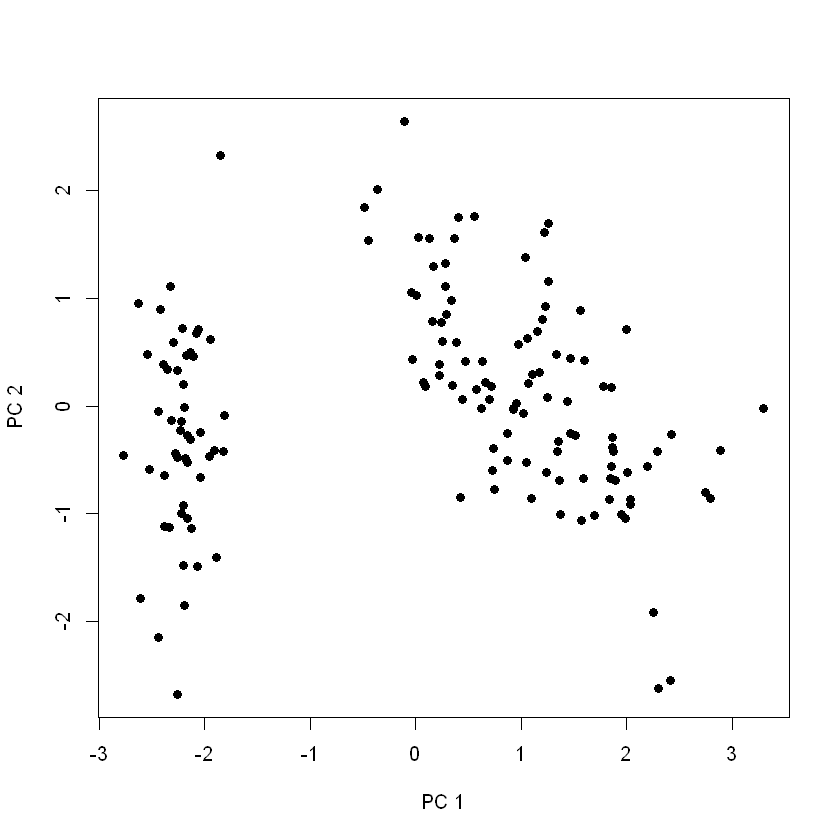

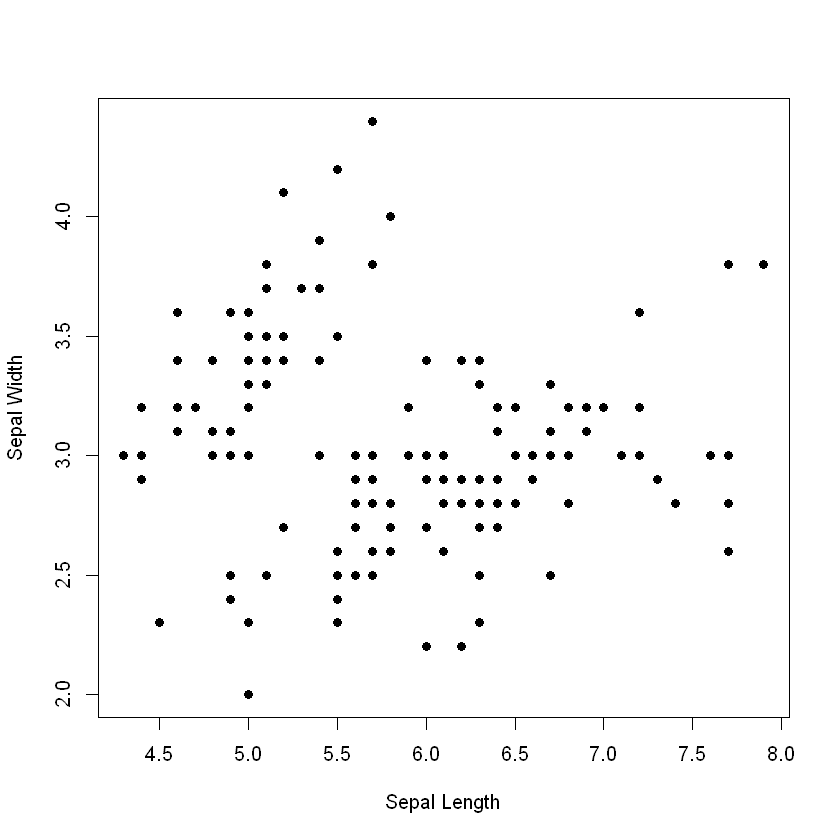

In [28]:
library(tidyverse)
iris.pca <- iris[,-5] %>% prcomp(center = TRUE, scale = TRUE)
plot(x=iris.pca$x[,1],y=iris.pca$x[,2], pch=16,xlab="PC 1", ylab="PC 2")
plot(x=iris$Sepal.Length,y=iris$Sepal.Width, pch=16,xlab="Sepal Length", ylab="Sepal Width")


**PC Loadings**

- Observations can be plotted ("projected") in space of PC's 
- Roughly, equivalent to rotating the axes and plotting original data points in the new axes $Z_1,\, Z_2$.


In [33]:
iris.pca$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


A lot of methods (PCA included) can be thought of as decomposing a data matrix $X_{n\times p}$, into a mixture of $k$ archetypes
$$
 X \approx U V^{\top},
$$
where $V_{p\times k}$ is a matrix of archetypes and $U_{n\times k}$ is a matrix of weights (for mixing archetypes to get $X$). One can also think of this as a "vector space embedding" (where our weights determine the embedding)

It is not easy to choosing the number of principal components. There exist multiple proposals such as using gap statistic, universal threshold, clever cross-validations, etc. None of this methods dominate the rest. The right choice eventually comes down to the needs in a particular analysis project. For instance, the number of PCs to choose should be two if for visualization on a two-dimensional surface. 
    

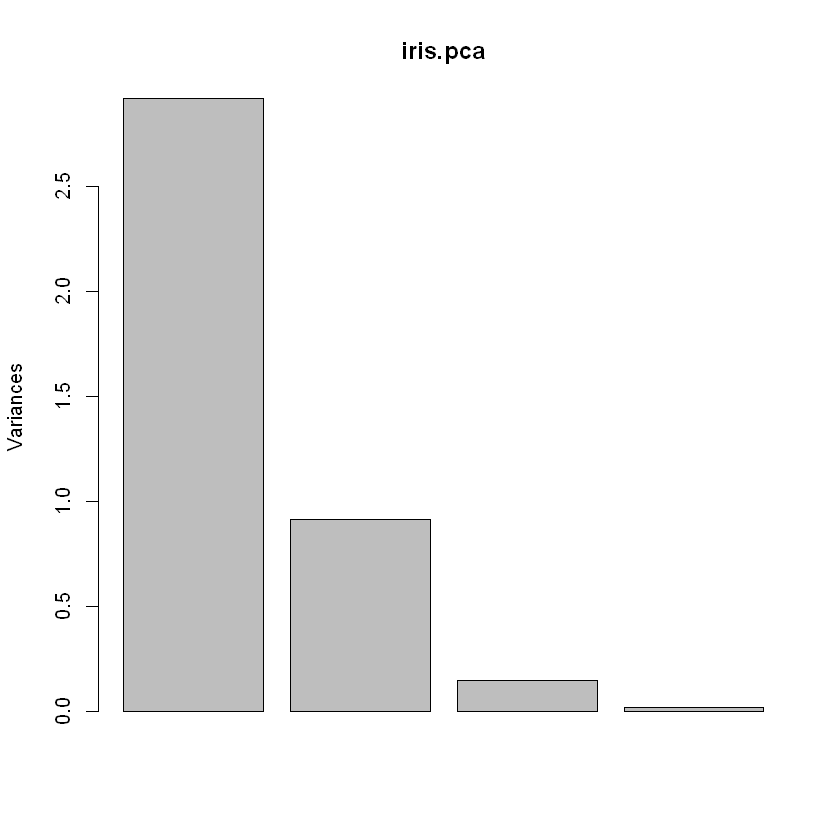

In [34]:
plot(iris.pca)

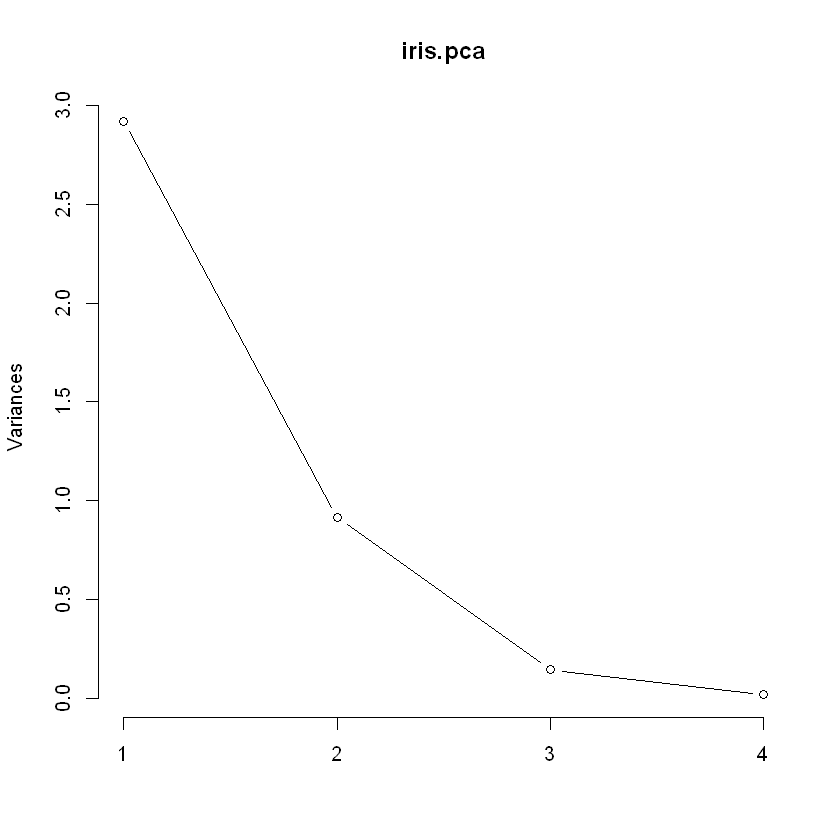

In [38]:
plot(iris.pca,type="l")

To summarize:

- Data: $n$ observations living in a $p$-dimensional space
- Not all $p$ dimensions are equally useful
- Many are either completely redundant (correlated features) or uninformative (noise features).
- Need  low-dimensional representation of the variables that captures most of the "information" in the data.
- To maximize the information retained, we need to minimize the redundancy, and to do this, we look for low-dimensional representations that capture most of the variation in the data.
